# Information Retrieval
 
La Recuperación de Información (Information Retrieval, IR) es la ciencia que permite encontrar información en datos de naturaleza no estructurada, dada una necesidad de información.

Imaginad que queremos tener un buscador de libros.

<img src=https://i.imgur.com/CLRu4C7.png>

> Se plantean algunos retos...

El diagrama de una arquitectura genérica para un sistema de IR que veíamos:

<img src=https://www.tutorialspoint.com/natural_language_processing/images/relevant_output_about_information.jpg>

## Partes de la arquitectura

- The User: ....
- Query: "comics de batman"
- Query operations: Transforma la query de texto, en alguna representación común a la de los documentos.
- Document collection: ...
- Indexer: Representación común de los documentos.
- Retrieval System + Rankeo: Modelo o sistema, que calcula que documentos son más relevantes, dada la query del usuario.
- Feedback: explícito o implícito 

## ¿Como lo hacemos?

Vamos a ver algunos ejemplos de implementaciones sencillas de sistemas de IR.

## Recursos

* [Information Retrieval Book](https://nlp.stanford.edu/IR-book/) Recomendadíssimo.
* [Papers](https://ai.google/research/pubs?area=InformationRetrievalandtheWeb), muchos papers
* [Neural IR Recap](https://arxiv.org/pdf/1705.01509.pdf)

# Boolean Retrieval

Modelo más simple de Information Retrieval (IR). Basado en lógica booleana y teoría de conjuntos, los documentos estarán representados por un vector de tamaño el vocabulario del corpus, y tendrá como valores 1 o 0 (Term Presence).

En esencia, es un bag-of-words donde solo se considera la presencia (o ausencia) de las palabras que conforman el vocabulario.

Las queries estarán también expresadas mediante lógica booleana (otro vector similar al de un documento).

Nuestro corpus - o conjunto de documentos - estará representado como una matriz de documento-término

In [2]:
import numpy as np

In [3]:
V = 5  # número de palabras en el vocabulario
D = 3  # número de documentos en el corpus

a = np.random.randint(2, size=(D,V), dtype="bool")
a.shape

(3, 5)

In [4]:
# Matriz documento-término con el Term Presence como feature weight
a

array([[ True,  True, False,  True, False],
       [ True,  True, False,  True,  True],
       [False, False,  True, False, False]])

In [5]:
a[0,:]

array([ True,  True, False,  True, False])

In [6]:
a[:,1]

array([ True,  True, False])

Con numpy tambien podemos hacer uso de puertas lógicas

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.logic.html

In [7]:
np.logical_and(a[0,:], a[1,:])

array([ True,  True, False,  True, False])

In [8]:
np.logical_and(np.logical_and(a[0,:], a[1,:]), np.logical_not(a[2,:]))

array([ True,  True, False,  True, False])

Por ejemplo, si quiero todos los documentos que contengan el termino 0 o 1

In [9]:
feat_vect = np.array([False, False, True, False, False])  # query de prueba

In [10]:
a

array([[ True,  True, False,  True, False],
       [ True,  True, False,  True,  True],
       [False, False,  True, False, False]])

In [11]:
np.dot(a, feat_vect)

array([False, False,  True])

### Sparse Representations

In [12]:
from scipy.sparse import csr_matrix

In [13]:
a_sparse = csr_matrix(a)
a_sparse[:].nonzero()

(array([0, 0, 0, 1, 1, 1, 1, 2], dtype=int32),
 array([0, 1, 3, 0, 1, 3, 4, 2], dtype=int32))

In [14]:
from sys import getsizeof
print(getsizeof(a), getsizeof(a_sparse))

127 64


## Inverted Indexes

In [15]:
documents = [
    "Julio Cesar era un emperador romano",
    "La ensalada Cesar lleva tomate lechuga y pollo",
    "El restaurante Casa Cesar ofrece una variedad de platos muy grande",
    "Las ensaladas son muy sanas",
    "A Cesar le gustan mucho las ensaladas",
    "Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar"
]

In [16]:
vocabulary = set([t for doc in documents for t in doc.split(" ")])
w2id = {k:i for i, k in enumerate(vocabulary)}

In [19]:
doc_matrix = np.zeros((len(documents), len(vocabulary)))
doc_matrix.shape

(6, 42)

In [20]:
doc_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [23]:
for i, doc in enumerate(documents):
    for t in doc.split(" "):
        doc_matrix[i, w2id[t]]+=1
doc_matrix

array([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 3., 1., 1.,

In [33]:
documents

['Julio Cesar era un emperador romano',
 'La ensalada Cesar lleva tomate lechuga y pollo',
 'El restaurante Casa Cesar ofrece una variedad de platos muy grande',
 'Las ensaladas son muy sanas',
 'A Cesar le gustan mucho las ensaladas',
 'Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar']

In [24]:
inverted_index = {}
for id_doc, doc in enumerate(documents):
    for t in doc.split(" "):
        if t in inverted_index:
            inverted_index[t].append(id_doc)
        else:
            inverted_index[t] = [id_doc]
inverted_index

{'Julio': [0],
 'Cesar': [0, 1, 2, 4, 5, 5, 5],
 'era': [0, 5],
 'un': [0, 5],
 'emperador': [0, 5],
 'romano': [0],
 'La': [1],
 'ensalada': [1],
 'lleva': [1],
 'tomate': [1],
 'lechuga': [1],
 'y': [1, 5],
 'pollo': [1],
 'El': [2],
 'restaurante': [2],
 'Casa': [2],
 'ofrece': [2],
 'una': [2],
 'variedad': [2],
 'de': [2],
 'platos': [2],
 'muy': [2, 3],
 'grande': [2],
 'Las': [3],
 'ensaladas': [3, 4],
 'son': [3],
 'sanas': [3],
 'A': [4, 5],
 'le': [4, 5],
 'gustan': [4],
 'mucho': [4],
 'las': [4],
 'el': [5],
 'más': [5],
 'querido.': [5],
 'construyeron': [5],
 'museo.': [5],
 'Los': [5],
 'hombres': [5],
 'mujeres': [5],
 'aclamaban': [5],
 'a': [5]}

In [26]:
# Una pequeña mejora. Se indica no solo el documento si no también "dónde" se encuentra en dichos documentos
inverted_index = {}
for id_doc, doc in enumerate(documents):
    for pos, t in enumerate(doc.split(" ")):
        if t in inverted_index:
            inverted_index[t].append((id_doc,pos))
        else:
            inverted_index[t] = [(id_doc,pos)]
inverted_index

{'Julio': [(0, 0)],
 'Cesar': [(0, 1), (1, 2), (2, 3), (4, 1), (5, 0), (5, 7), (5, 18)],
 'era': [(0, 2), (5, 1)],
 'un': [(0, 3), (5, 10)],
 'emperador': [(0, 4), (5, 3)],
 'romano': [(0, 5)],
 'La': [(1, 0)],
 'ensalada': [(1, 1)],
 'lleva': [(1, 3)],
 'tomate': [(1, 4)],
 'lechuga': [(1, 5)],
 'y': [(1, 6), (5, 14)],
 'pollo': [(1, 7)],
 'El': [(2, 0)],
 'restaurante': [(2, 1)],
 'Casa': [(2, 2)],
 'ofrece': [(2, 4)],
 'una': [(2, 5)],
 'variedad': [(2, 6)],
 'de': [(2, 7)],
 'platos': [(2, 8)],
 'muy': [(2, 9), (3, 3)],
 'grande': [(2, 10)],
 'Las': [(3, 0)],
 'ensaladas': [(3, 1), (4, 6)],
 'son': [(3, 2)],
 'sanas': [(3, 4)],
 'A': [(4, 0), (5, 6)],
 'le': [(4, 2), (5, 8)],
 'gustan': [(4, 3)],
 'mucho': [(4, 4)],
 'las': [(4, 5)],
 'el': [(5, 2)],
 'más': [(5, 4)],
 'querido.': [(5, 5)],
 'construyeron': [(5, 9)],
 'museo.': [(5, 11)],
 'Los': [(5, 12)],
 'hombres': [(5, 13)],
 'mujeres': [(5, 15)],
 'aclamaban': [(5, 16)],
 'a': [(5, 17)]}

In [40]:
query = ['ensalada', 'Cesar']

In [41]:
# Si ALGUNO (OR) de los términos aparece en el documento -> print(doc)
for q_item in query:
    if q_item in inverted_index:
        for doc_id in inverted_index[q_item]:
            print(documents[doc_id[0]])

La ensalada Cesar lleva tomate lechuga y pollo
Julio Cesar era un emperador romano
La ensalada Cesar lleva tomate lechuga y pollo
El restaurante Casa Cesar ofrece una variedad de platos muy grande
A Cesar le gustan mucho las ensaladas
Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar
Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar
Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar


In [42]:
# Si AMBOS (AND) de los términos aparece en el documento -> print(doc)
possible_docs ={}
for q_item in query:
    if q_item in inverted_index:
        for doc_id in inverted_index[q_item]:
            if doc_id[0] in possible_docs:
                possible_docs[doc_id[0]]+=1
            else:
                possible_docs[doc_id[0]]=1
true_docs = [doc_id for doc_id, count in possible_docs.items() if count == len(query)]
for doc in true_docs:
    print(documents[doc])

La ensalada Cesar lleva tomate lechuga y pollo


# Vector Spaces 

<img src=http://blog.christianperone.com/wp-content/uploads/2013/09/vector_space.png width=450px>

A diferencia del modelo booleano, las componentes en los vectores de cada documento tendrán un valor distinto al Term Presence. Dicho peso puede ser el que elijamos (por ejemplo, Term Frequency, o TF-IDF).

Pese a que el estado del arte muestra que modelos basados en Deep Learning arrojan mejores resultados, muy posiblemente la mayoría de sistemas de IR funcionen con alguna aproximación a este tipo de algoritmos.

Recordemos: Term Frequency y Document Frequency.

## TF y DF

<img src=https://i.imgur.com/9o3G6Ia.png>

## TF-IDF

Term Frequency - Inverse Document Frequency.

El weigth dado por el algoritmo tf-idf equivale a cuantas más veces aparezca una palabra en un documento, y cuantas menos veces aparezca en otros documentos, más importante será esa palabra para ese documento.

In [43]:
nb_docs = len(documents)
vocab_size = len(vocabulary)

In [46]:
vector_docs = np.zeros(shape=(nb_docs, vocab_size))
vector_docs.shape

(6, 42)

## Term Frequency, algunas maneras de calcularlo

In [48]:
# Term Presence (boolean TF)
tp_w = np.zeros(shape=(nb_docs, vocab_size))
for i, doc in enumerate(documents):
    for t in doc.split(" "):
        tp_w[i, w2id[t]] = 1
print(tp_w)

[[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.]]


In [49]:
# TF
tf_w = np.zeros(shape=(nb_docs, vocab_size))
for i, doc in enumerate(documents):
    for t in doc.split(" "):
        tf_w[i, w2id[t]] += 1
print(tf_w)

[[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 3. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.]]


In [50]:
# TF normalizado
tf_w = np.zeros(shape=(nb_docs, vocab_size))
for i, doc in enumerate(documents):
    for t in doc.split(" "):
        tf_w[i, w2id[t]] += 1
    tf_w[i,:] /=len(doc.split(" "))
print(tf_w)

[[0.         0.16666667 0.         0.         0.16666667 0.
  0.16666667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.16666667
  0.16666667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.16666667
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.125      0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.125      0.         0.125      0.
  0.         0.125      0.         0.         0.         0.
  0.         0.         0.         0.         0.125      0.125
  0.         0.         0.         0.         0.125      0.
  0.         0.125      0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.09090909 0.
  0.         0.         0.         0.         0.         0.0909

In [51]:
# TF log
def apply_log(a, eps=0.1):
    a = a if a > 0 else eps
    return np.log(1+a)
vlog = np.vectorize(apply_log)

tf_w = np.zeros(shape=(nb_docs, vocab_size))
for i, doc in enumerate(documents):
    for t in doc.split(" "):
        tf_w[i, w2id[t]] += 1
tf_w = vlog(tf_w)
print(tf_w)

[[0.09531018 0.69314718 0.09531018 0.09531018 0.69314718 0.09531018
  0.69314718 0.09531018 0.09531018 0.09531018 0.09531018 0.09531018
  0.09531018 0.09531018 0.09531018 0.09531018 0.09531018 0.69314718
  0.69314718 0.09531018 0.09531018 0.09531018 0.09531018 0.09531018
  0.09531018 0.09531018 0.09531018 0.09531018 0.09531018 0.09531018
  0.09531018 0.09531018 0.09531018 0.09531018 0.09531018 0.69314718
  0.09531018 0.09531018 0.09531018 0.09531018 0.09531018 0.09531018]
 [0.09531018 0.09531018 0.09531018 0.09531018 0.69314718 0.09531018
  0.09531018 0.09531018 0.09531018 0.09531018 0.09531018 0.09531018
  0.09531018 0.09531018 0.69314718 0.09531018 0.69314718 0.09531018
  0.09531018 0.69314718 0.09531018 0.09531018 0.09531018 0.09531018
  0.09531018 0.09531018 0.09531018 0.09531018 0.69314718 0.69314718
  0.09531018 0.09531018 0.09531018 0.09531018 0.69314718 0.09531018
  0.09531018 0.69314718 0.09531018 0.09531018 0.09531018 0.09531018]
 [0.09531018 0.09531018 0.09531018 0.09531018 

In [52]:
from collections import Counter

In [53]:
# TF Augmented
def apply_augmented(a, max_w):
    return 0.5+((0.5*a)/max_w)
vaug = np.vectorize(apply_augmented)

tf_w = np.zeros(shape=(nb_docs, vocab_size))
for i, doc in enumerate(documents):
    tokens = doc.split(" ")
    max_w = Counter(tokens).most_common(1)[0][1]
    for t in tokens:
        tf_w[i, w2id[t]] += 1
    tf_w[i,:] = vaug(tf_w[i,:], max_w)

print(tf_w)

[[0.5        1.         0.5        0.5        1.         0.5
  1.         0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        1.
  1.         0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        1.
  0.5        0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        1.         0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        1.         0.5        1.         0.5
  0.5        1.         0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        1.         1.
  0.5        0.5        0.5        0.5        1.         0.5
  0.5        1.         0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        1.         0.5
  0.5        0.5        0.5        0.5        0.5        1.
  1.        

## IDF, algunas formas de calcularlo

El IDF se computa como el numero de documentos dividido por el numero de veces que aparece el termino t en un la colección de documentos.

In [54]:
from math import log

In [55]:
# DF
df_dict = {w:0 for w in vocabulary}
for doc in documents:
    for w in df_dict.keys():
        if w in doc.split(" "):
            df_dict[w]+=1.0
print(df_dict)

{'A': 2.0, 'romano': 1.0, 'aclamaban': 1.0, 'son': 1.0, 'Cesar': 5.0, 'querido.': 1.0, 'emperador': 2.0, 'mucho': 1.0, 'Los': 1.0, 'gustan': 1.0, 'Las': 1.0, 'de': 1.0, 'muy': 2.0, 'museo.': 1.0, 'tomate': 1.0, 'ofrece': 1.0, 'y': 2.0, 'era': 2.0, 'Julio': 1.0, 'pollo': 1.0, 'le': 2.0, 'las': 1.0, 'variedad': 1.0, 'restaurante': 1.0, 'El': 1.0, 'una': 1.0, 'platos': 1.0, 'hombres': 1.0, 'lechuga': 1.0, 'lleva': 1.0, 'más': 1.0, 'a': 1.0, 'grande': 1.0, 'el': 1.0, 'ensalada': 1.0, 'un': 2.0, 'mujeres': 1.0, 'La': 1.0, 'ensaladas': 2.0, 'sanas': 1.0, 'Casa': 1.0, 'construyeron': 1.0}


In [56]:
# Basic IDF
idf_w = np.zeros(shape=(nb_docs, vocab_size))
for i, doc in enumerate(documents):
    tokens = doc.split(" ")
    for t in tokens:
        idf_w[i, w2id[t]] = log(nb_docs/df_dict[t])
print(idf_w)

[[0.         1.79175947 0.         0.         0.18232156 0.
  1.09861229 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.09861229
  1.79175947 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.09861229
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.18232156 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.79175947 0.         1.09861229 0.
  0.         1.79175947 0.         0.         0.         0.
  0.         0.         0.         0.         1.79175947 1.79175947
  0.         0.         0.         0.         1.79175947 0.
  0.         1.79175947 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.18232156 0.
  0.         0.         0.         0.         0.         1

In [57]:
# Smooth IDF
idf_w = np.zeros(shape=(nb_docs, vocab_size))
for i, doc in enumerate(documents):
    tokens = doc.split(" ")
    for t in tokens:
        idf_w[i, w2id[t]] = log(1+(1+nb_docs/1+df_dict[t]))
print(idf_w)

[[0.         2.19722458 0.         0.         2.56494936 0.
  2.30258509 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         2.30258509
  2.19722458 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         2.30258509
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.56494936 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         2.19722458 0.         2.30258509 0.
  0.         2.19722458 0.         0.         0.         0.
  0.         0.         0.         0.         2.19722458 2.19722458
  0.         0.         0.         0.         2.19722458 0.
  0.         2.19722458 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.56494936 0.
  0.         0.         0.         0.         0.         2

## TF-IDF

In [58]:
tf_idf_w = tf_w * idf_w
tf_idf_w.shape

(6, 42)

In [59]:
tf_idf_w[5,:]

array([1.53505673, 0.        , 1.46481638, 0.        , 2.56494936,
       1.46481638, 1.53505673, 0.        , 1.46481638, 0.        ,
       0.        , 0.        , 0.        , 1.46481638, 0.        ,
       0.        , 1.53505673, 1.53505673, 0.        , 0.        ,
       1.53505673, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.46481638, 0.        , 0.        ,
       1.46481638, 1.46481638, 0.        , 1.46481638, 0.        ,
       1.53505673, 1.46481638, 0.        , 0.        , 0.        ,
       0.        , 1.46481638])

## Feature Matrix

In [60]:
import pandas as pd

In [61]:
pd.DataFrame(tf_idf_w, columns=vocabulary)

,A,romano,aclamaban,son,Cesar,querido.,emperador,mucho,Los,gustan,...,grande,el,ensalada,un,mujeres,La,ensaladas,sanas,Casa,construyeron
0,0.000000,2.197225,0.000000,0.000000,2.564949,0.000000,2.302585,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.197225,0.000000,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,0.000000
3,0.000000,0.000000,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585,2.197225,0.000000,0.000000
4,2.302585,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,2.197225,0.000000,2.197225,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585,0.000000,0.000000,0.000000
5,1.535057,0.000000,1.464816,0.000000,2.564949,1.464816,1.535057,0.000000,1.464816,0.000000,...,0.000000,1.464816,0.000000,1.535057,1.464816,0.000000,0.000000,0.000000,0.000000,1.464816


In [62]:
documents

['Julio Cesar era un emperador romano',
 'La ensalada Cesar lleva tomate lechuga y pollo',
 'El restaurante Casa Cesar ofrece una variedad de platos muy grande',
 'Las ensaladas son muy sanas',
 'A Cesar le gustan mucho las ensaladas',
 'Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar']

## Esto ya lo conocíamos (TfIdfVectorizer)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
docs = np.array(documents)
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(docs)


In [65]:
pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())

,aclamaban,casa,cesar,construyeron,de,el,emperador,ensalada,ensaladas,era,...,pollo,querido,restaurante,romano,sanas,son,tomate,un,una,variedad
0,0.000000,0.000000,0.247650,0.000000,0.000000,0.000000,0.396380,0.000000,0.000000,0.396380,...,0.000000,0.000000,0.000000,0.483382,0.000000,0.000000,0.000000,0.396380,0.000000,0.000000
1,0.000000,0.000000,0.204726,0.000000,0.000000,0.000000,0.000000,0.399601,0.000000,0.000000,...,0.399601,0.000000,0.000000,0.000000,0.000000,0.000000,0.399601,0.000000,0.000000,0.000000
2,0.000000,0.322626,0.165290,0.000000,0.322626,0.264558,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.322626,0.000000,0.000000,0.000000,0.000000,0.000000,0.322626,0.322626
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409125,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.498924,0.498924,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.247650,0.000000,0.000000,0.000000,0.000000,0.000000,0.396380,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.269931,0.000000,0.414879,0.269931,0.000000,0.221347,0.221347,0.000000,0.000000,0.221347,...,0.000000,0.269931,0.000000,0.000000,0.000000,0.000000,0.000000,0.221347,0.000000,0.000000


## Plotting documents

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tfidf_low_dim = TSNE(n_components=2).fit_transform(tf_idf_w)

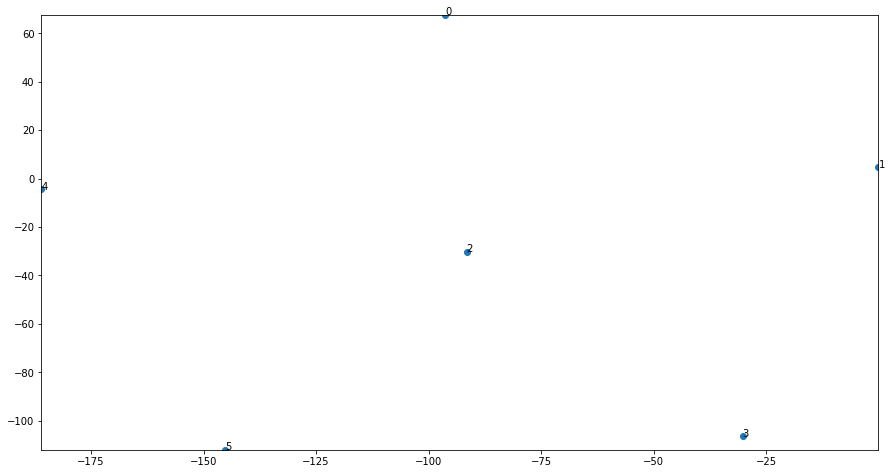

In [67]:
maxx = max(tfidf_low_dim[:, 0])+0.0001
minx = min(tfidf_low_dim[:, 0])-0.0001
maxy = max(tfidf_low_dim[:, 1])+0.0001
miny = min(tfidf_low_dim[:, 1])-0.0001

fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(tfidf_low_dim[:, 0], tfidf_low_dim[:, 1], cmap=plt.cm.Spectral)
plt.axis([minx, maxx, miny, maxy])
for i, txt in enumerate(np.arange(nb_docs).tolist()):
    ax.annotate(txt, (tfidf_low_dim[:, 0][i],tfidf_low_dim[:, 1][i]))
plt.show()

## Querying the model


![](http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png)



In [77]:
documents

['Julio Cesar era un emperador romano',
 'La ensalada Cesar lleva tomate lechuga y pollo',
 'El restaurante Casa Cesar ofrece una variedad de platos muy grande',
 'Las ensaladas son muy sanas',
 'A Cesar le gustan mucho las ensaladas',
 'Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar']

In [91]:
query = 'ensalada Cesar sanas'

In [92]:
q_w = np.zeros(shape=(1, vocab_size))

for t in query.split(" "):
    if t in w2id:
        q_w[0, w2id[t]] += 1
q_tf = q_w
q_tf.shape

(1, 42)

In [93]:
q_tf

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0.]])

In [71]:
q_idf = np.zeros(shape=(1, vocab_size))

tokens = query.split(" ")
for t in tokens:
    if t in w2id:
        q_idf[0, w2id[t]] = log((nb_docs/df_dict[t]))
q_idf

array([[0.        , 0.        , 0.        , 0.        , 0.18232156,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.79175947,
        0.        , 0.        , 0.        , 0.        , 1.79175947,
        0.        , 0.        ]])

In [72]:
query_rep = q_tf * q_idf
query_rep

array([[0.        , 0.        , 0.        , 0.        , 0.18232156,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.79175947,
        0.        , 0.        , 0.        , 0.        , 1.79175947,
        0.        , 0.        ]])

### Cosine similarity

Visualización de Cosine Similarity


![](https://lh4.googleusercontent.com/SodVc3Xo77b8LhEjqXymSaA-bI-kQdPeY8uG-J0wSSp5q-pxVAf_rPMUX9Y)



In [94]:
def cos_similarity(x, y):
    numerator = np.sum(x*y, axis=-1)
    a = np.sqrt(np.sum(x**2, axis=-1))
    b = np.sqrt(np.sum(y**2, axis=-1))
    denominator = a*b
    return numerator/denominator

In [95]:
for i in range(nb_docs):
    print(documents[i], cos_similarity(query_rep, tf_idf_w[i,:]))

Julio Cesar era un emperador romano [0.03246954]
La ensalada Cesar lleva tomate lechuga y pollo [0.27126979]
El restaurante Casa Cesar ofrece una variedad de platos muy grande [0.02474665]
Las ensaladas son muy sanas [0.30939422]
A Cesar le gustan mucho las ensaladas [0.03027524]
Cesar era el emperador más querido. A Cesar le construyeron un museo. Los hombres y mujeres aclamaban a Cesar [0.02834505]


In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
cosine_similarity(query_rep, tf_idf_w)

array([[0.03246954, 0.27126979, 0.02474665, 0.30939422, 0.03027524,
        0.02834505]])